In [1]:
#importing modules
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import datetime
import time
from sklearn import metrics
import os

In [2]:
#Changing working directory
os.chdir(r'D:\Coding\projects\Palak_Paneer')
os.getcwd()

'D:\\Coding\\projects\\Palak_Paneer'

In [5]:
#loading the final train dataset
df_full = pd.read_csv(r"train_datasets\train_clean_full.csv")
print(df_full.shape)
#df_full.head()

(891, 20)


#### Applying random forest

In [6]:
#breaking down into X and y arrays, removing categorical vars - these vars(except Name) have already been made into booleans: train
X = df_full.drop(['Survived','Name','Sex','Ticket','Embarked','Pclass'], axis = 1)
y = pd.DataFrame(df_full['Survived'])
print(X.shape)
print(y.shape)
#X.head()

(891, 14)
(891, 1)


In [7]:
#train, dev split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.1)

In [8]:
#random forest - main
clf=RandomForestClassifier(n_estimators=50, min_samples_split = 20, min_samples_leaf= 15, oob_score = True, verbose = 0)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

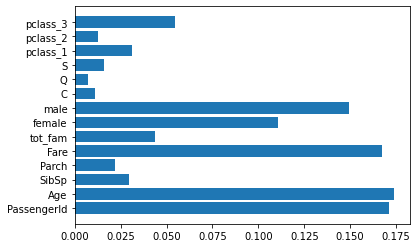

In [9]:
#feature importance
plt.barh(X_train.columns, clf.feature_importances_)
plt.show()

In [ ]:
print('Accuracy Score on train: ', clf.score(X_train, y_train))
print('Accuracy Score on oob data: ', clf.oob_score_)

In [10]:
#prediction y for dev data 
y_pred_dev=clf.predict(X_dev)

In [11]:
y_dev = y_dev['Survived'].to_numpy()
y_dev

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0], dtype=int64)

In [12]:
#creates confusion matrix from dev data
confusion_matrix = pd.DataFrame(metrics.confusion_matrix(y_dev, y_pred_dev, labels=[0,1]))
print(confusion_matrix)

sns.heatmap(confusion_matrix, annot=True)

[[41 10]
 [14 25]]


In [13]:
#calculating accuracy and other scores
accuracy_dev = metrics.accuracy_score(y_dev, y_pred_dev)
print('accuracy is: '+ str(accuracy_dev))
precision_dev = metrics.precision_score(y_dev, y_pred_dev)
print('precision is: '+ str(precision_dev))
sensitivity_dev = metrics.recall_score(y_dev, y_pred_dev)
print('sensitivity is: '+ str(sensitivity_dev))
f1_score_dev = metrics.f1_score(y_dev, y_pred_dev)
print('f1_score is: '+ str(f1_score_dev))

accuracy is: 0.7333333333333333
precision is: 0.7142857142857143
sensitivity is: 0.6410256410256411
f1_score is: 0.6756756756756757


## Test pipeline-predicts and creates submission csv

### Loading the final test dataset

In [14]:
#loading test dataset
df_full_test = pd.read_csv(r"test_datasets/test_clean_full.csv")
print(df_full_test.shape)
df_full_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#breaking down into X and y arrays, removing categorical vars - these vars(except Name) have already been made into booleans: train
X_test = X_test.drop(['Name','Sex','Ticket','Embarked','Pclass', 'interaction_QC'], axis = 1)
print(X_test.shape)
print(X.shape)
#X.head()

In [16]:
print(X_train.columns)
print(X_test.columns)

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'tot_fam', 'female',
       'male', 'C', 'Q', 'S', 'pclass_1', 'pclass_2', 'pclass_3'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'tot_fam'],
      dtype='object')


### Predicting on the amended test dataset and preparing the file for submission

In [ ]:
#prediction y for dev data 
y_pred_test=clf.predict(X_test)

In [ ]:
#subsetting only the Passenger Id column for final submission 
X_concat = X_test[['PassengerId']]
X_concat.head()

In [ ]:
#creating final submission csv
y_pred_test_df = pd.DataFrame(y_pred_test)
y_pred_test_df.rename(columns = {0:'Survived'},inplace = True)
csv_submission = pd.merge(X_concat,y_pred_test_df, left_index=True, right_index=True)
print(csv_submission.shape)
csv_submission.head()

In [ ]:
#saving csv with a unique timestamp
timestamp = str(datetime.datetime.now().strftime('%Y%m%d%H%M%S'))
timestamp
csv_submission.to_csv(r'submission\csv_submission' + timestamp + '.csv', index =False)